In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

#1. Data loading and inspection

In [37]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Titanic.csv")

In [38]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [39]:
# Print the summary information of the DataFrame
print("\nSummary information of the DataFrame:")
print(df.info())
print(df.describe())
print(df.shape)



Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000 

# 2. Data Cleaning

In [40]:
# Identify and list any columns with missing values and the percentage of missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

# Handle missing values: Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_drop)

# Replace 'Age' with the correct column name if it's different
# Handle missing values in the remaining columns (e.g., filling with median for numerical, mode for categorical)
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)  # Example for a numerical column
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Example for a categorical column

# Convert columns to appropriate data types
if 'Survived' in df.columns:
    df['Survived'] = df['Survived'].astype('category')  # Convert 'Survived' to category
if 'Pclass' in df.columns:
    df['Pclass'] = df['Pclass'].astype('category')  # Convert 'Pclass' to category

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Final DataFrame after cleaning
print("\nFinal DataFrame after cleaning:")
print(df.info())
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))



Columns with missing values and their percentage:
           Missing Values  Percentage
pclass                  0    0.000000
survived                0    0.000000
name                    0    0.000000
sex                     0    0.000000
age                   263   20.091673
sibsp                   0    0.000000
parch                   0    0.000000
ticket                  0    0.000000
fare                    1    0.076394
cabin                1014   77.463713
embarked                2    0.152788
boat                  823   62.872422
body                 1188   90.756303
home.dest             564   43.086325

Final DataFrame after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 

#3. Exploratory data analysis

## 3.1 Descriptive Statistics

Summary Statistics:
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  

Distribution of Passenger Ages:
Mean Age: 29.881137667304014
Median Age: 28.0
Standard Deviation of Age: 14.413493211271321

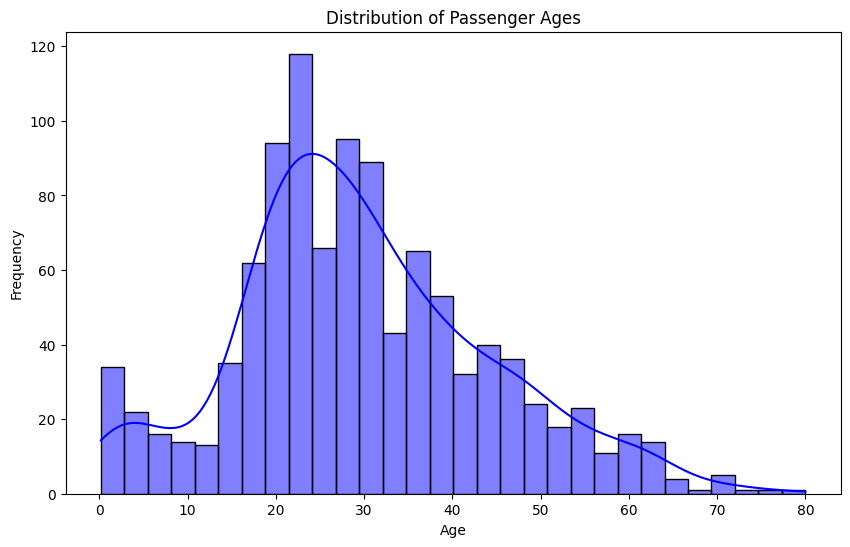

In [41]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

# Analyze the distribution of passenger ages
print("\nDistribution of Passenger Ages:")
print("Mean Age:", df['age'].mean())
print("Median Age:", df['age'].median())
print("Standard Deviation of Age:", df['age'].std())

# Plot the distribution of passenger ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## 3.2 Comparative Analysis

In [42]:
# Compare the survival rates across different passenger classes ('Pclass')
print("\nSurvival Rates by Passenger Class:")
print(df.groupby('pclass')['survived'].mean())

# Compare survival rates based on gender ('Sex')
print("\nSurvival Rates by Gender:")
print(df.groupby('sex')['survived'].mean())


Survival Rates by Passenger Class:
pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Survival Rates by Gender:
sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


## 3.3 Correlation Analysis

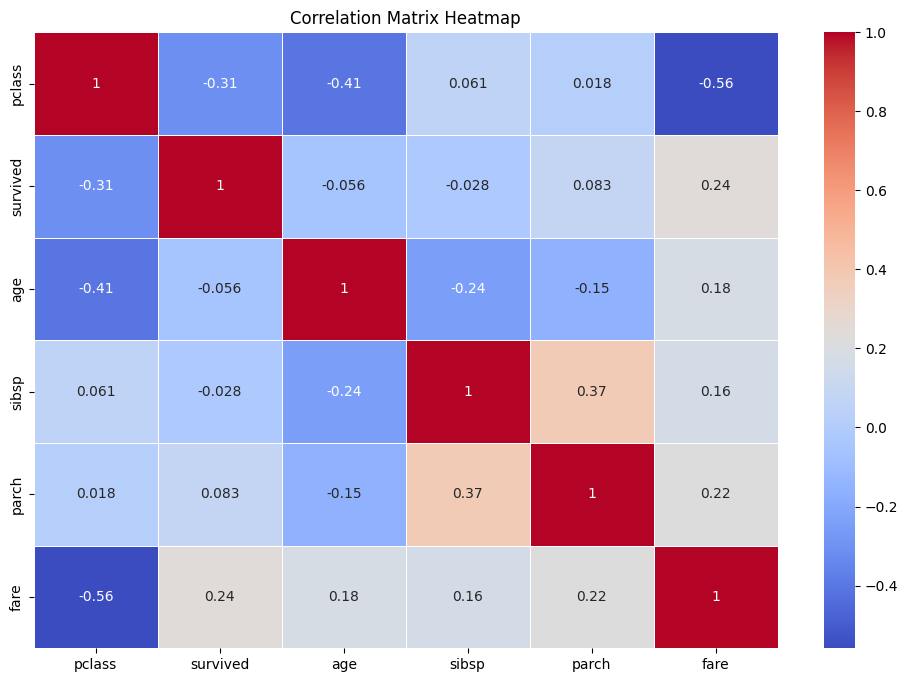

In [43]:
# Select only the numerical columns for correlation matrix calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#4. Data visualisation

## 4.1 The distribution of passenger classes using a bar plot

<ipython-input-44-a2242ffa12d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='viridis')


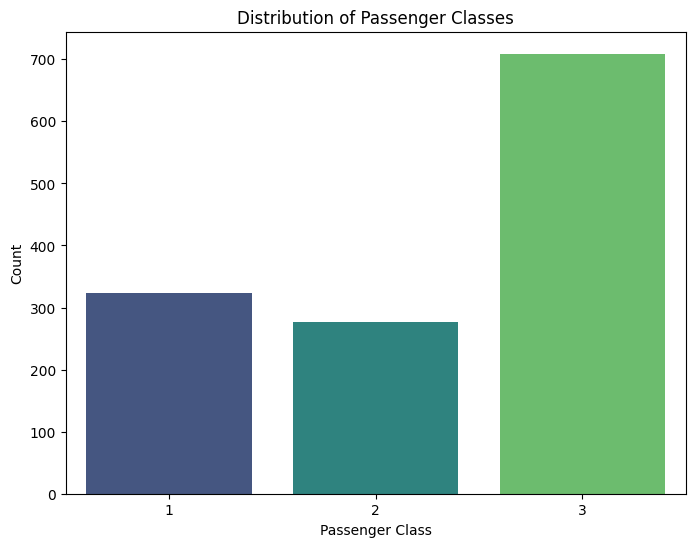

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df, palette='viridis')
plt.title("Distribution of Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

## 4.2 The distribution of survival status (Survived vs. Not Survived) using a pie chart

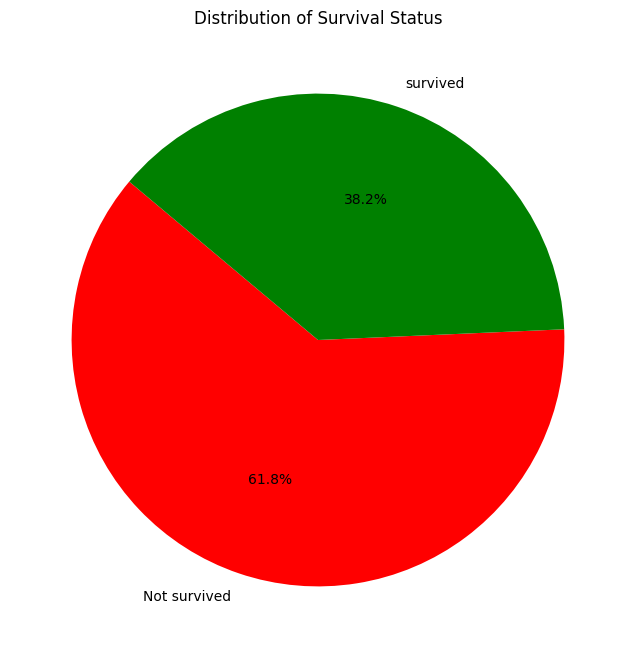

In [45]:
survived_counts = df['survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Not survived', 'survived'], autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title("Distribution of Survival Status")
plt.show()

## 4.3 The distribution of fares paid by passengers using a histogram


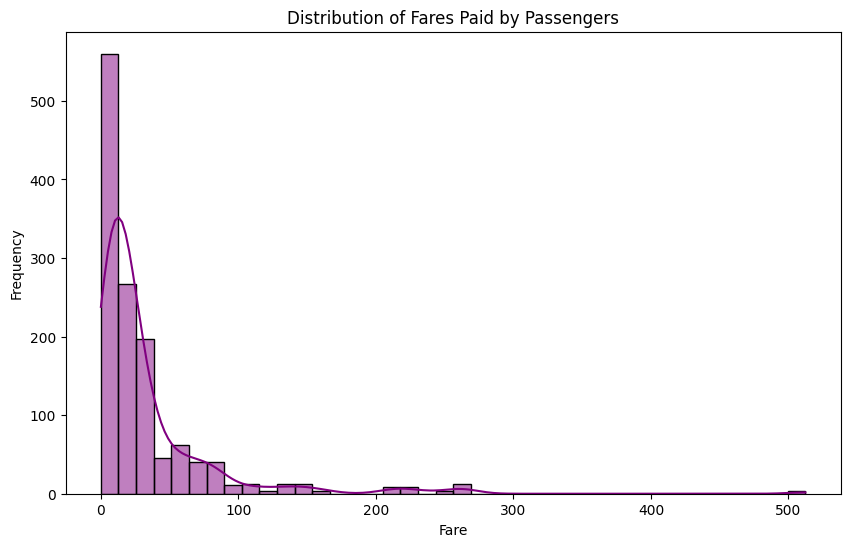

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], kde=True, bins=40, color='purple')
plt.title("Distribution of Fares Paid by Passengers")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

## 4.4 Box plots to compare the fare distribution across different passenger classes ('Pclass')

<ipython-input-47-58053f7c8153>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=df, palette='Set3')


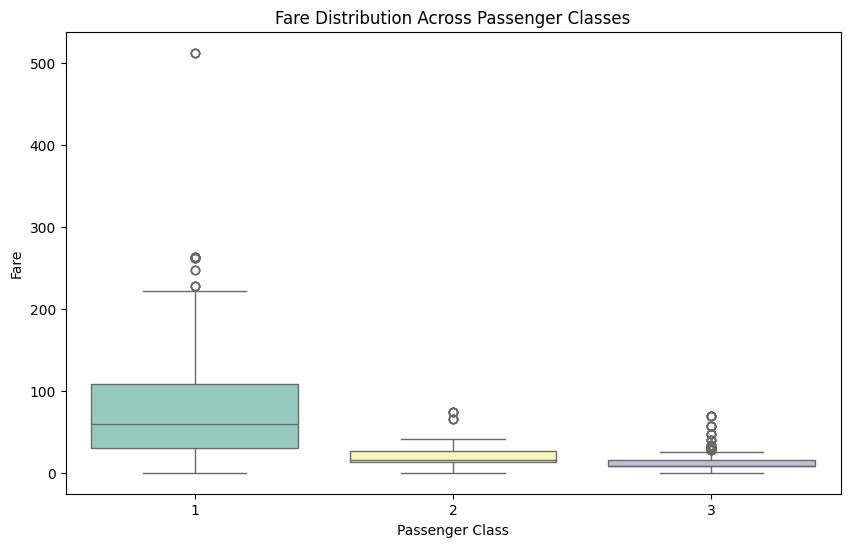

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df, palette='Set3')
plt.title("Fare Distribution Across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

#5. Conclusion and Insights

In [48]:
conclusion = """
Conclusion and Insights:

1. The descriptive statistics indicate that the mean age of passengers is around {mean_age:.2f} years,
   with a median of {median_age:.2f} years. The distribution of ages is slightly right-skewed.

2. Survival rates vary significantly across passenger classes and genders. First-class passengers had
   a much higher survival rate than those in third class. Additionally, women had a higher survival
   rate compared to men.

3. The correlation analysis reveals that there is a negative correlation between 'Pclass' and 'Fare',
   indicating that higher-class passengers tend to pay higher fares. There are also some other noteworthy
   correlations between the features, but none are particularly strong.

4. The visualizations highlight the stark differences in survival rates across different passenger classes
   and genders. The distribution of fares also shows a wide range, with some passengers paying significantly
   more than others.

These insights could be valuable for further studies on passenger demographics and for improving safety measures
on similar voyages. Understanding the factors that influenced survival could help in designing better evacuation
plans and resource allocation in emergency situations.
""".format(mean_age=df['age'].mean(), median_age=df['age'].median())

print(conclusion , "\nmean_age =",df['age'].mean(), "median_age =", df['age'].median())



Conclusion and Insights:

1. The descriptive statistics indicate that the mean age of passengers is around 29.88 years,
   with a median of 28.00 years. The distribution of ages is slightly right-skewed.

2. Survival rates vary significantly across passenger classes and genders. First-class passengers had
   a much higher survival rate than those in third class. Additionally, women had a higher survival
   rate compared to men.

3. The correlation analysis reveals that there is a negative correlation between 'Pclass' and 'Fare', 
   indicating that higher-class passengers tend to pay higher fares. There are also some other noteworthy
   correlations between the features, but none are particularly strong.

4. The visualizations highlight the stark differences in survival rates across different passenger classes
   and genders. The distribution of fares also shows a wide range, with some passengers paying significantly
   more than others.

These insights could be valuable for further s